# [Get Rich or Buy Trying](https://xpuzzlecorner.substack.com/p/get-rich-or-buy-trying-part-1)
October 6, 2024

## Problem

_We will consider two different types of behavior of this stock:_

1. _The stock has equal probability of going up or down each minute by p0/1000 where p0 is the initial value of the stock._

2. _The stock has equal probability of going up to a value of 1.001*p_t-1 or down to a value .999*p_t-1 each minute (where p_t-1 is the value of the stock for the previous minute)._

_Your job for this first puzzle it to determine the distribution of the value of the stock after 1 day. Assume the stock is traded for 7 hours a day (a bit off, I know)._

## Solution

For part 1, we can model the change in stock price with a binomial distribution. The stock price can either go up or down by p0/1000 each minute. The stock price at the end of the day is the sum of the changes in stock price over the course of the day. Since the stock price can only change by p0/1000 each minute, the stock price at the end of the day is a binomial distribution with n = 420 (7 hours * 60 minutes) and p = 0.5. We just need to shift and scale the distribution to account for the initial stock price. Let's assume P_0 = 1.

$ P(X = x) = \binom{420}{x} \left(\frac{1}{2}\right)^{420} $

$ x = 1 - \frac{1}{1000} (2k-n) \rightarrow k = \frac{1000(1-x) + n}{2}$

$ P(X = x) = \binom{420}{\frac{1000(1-x) + 420}{2}} \left(\frac{1}{2}\right)^{420} $

Part 2 is a little more complex

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/5j/d_pmm93d5qb7mpv0d38kkm8m0000gn/T/ipykernel_32998/826797787.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.text(mean, 0, f'$\mu = {mean:.2f}$', verticalalignment='bottom')


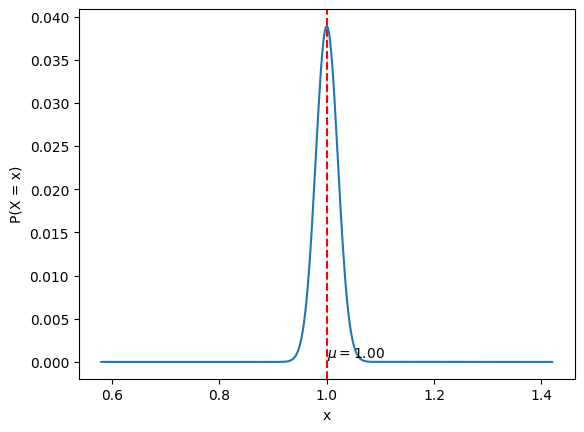

In [16]:
# Plot P(X = x) = \binom{420}{\frac{1000(1-x) + 420}{2}} \left(\frac{1}{2}\right)^{420}
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

n = 420
k = np.arange(0, n+1)  # k ranges from 0 to 420
x = 1 - (2 * k - n) / 1000  # Transform k to x
y = comb(n, k) * (0.5)**n  # Compute P(X = x)
# Compute the mean and add it as a dotted line to the plot
mean = np.sum(x*y)
plt.axvline(mean, color='r', linestyle='--')
plt.text(mean, 0, f'$\mu = {mean:.2f}$', verticalalignment='bottom')
plt.xlabel('x')
plt.ylabel('P(X = x)')

plt.plot(x, y)

Part 2 is a little more complex. The stock price can go up or down by 0.1% each minute. The stock price at the end of the day is the product of the changes in stock price over the course of the day. We can still model the number of up and down movements with a binomial distribution, but we now multiply the stock price by the results of the distribution. Again, let's assume P_0 = 1.

$ P(X = x) = \binom{420}{x} \left(\frac{1}{2}\right)^{420} $

$ \displaystyle x = 1.001^{k} 0.999^{n-k} \rightarrow k = 500 \cdot \ln(x \cdot e^{\frac{n}{1000}})$

$ \displaystyle P(X = x) = \binom{420}{500 \cdot \ln(x \cdot e^{\frac{n}{1000}})} \left(\frac{1}{2}\right)^{420} $

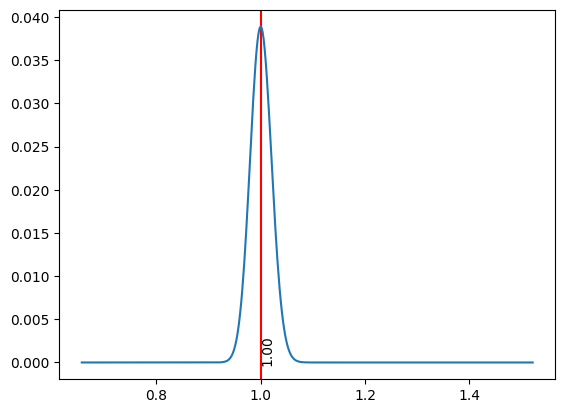

In [12]:
# Plot P(X = x) = \binom{420}{500 \cdot \ln(x \cdot e^{\frac{n}{1000}})} \left(\frac{1}{2}\right)^{420}
k = np.arange(0, n+1)
x = (1.001)**k * (0.999)**(n-k)
y = comb(n, 500 * np.log(x * np.exp(n/1000))) * (1/2)**n
# compute the mean and add to the plot
mean = np.sum(x*y)
plt.axvline(x=mean, color='r')
plt.text(mean, 0, f'{mean:.2f}', rotation=90)

plt.plot(x, y)

These look exceedingly similar but as the code below can demonstrate, there are not the same distribution.

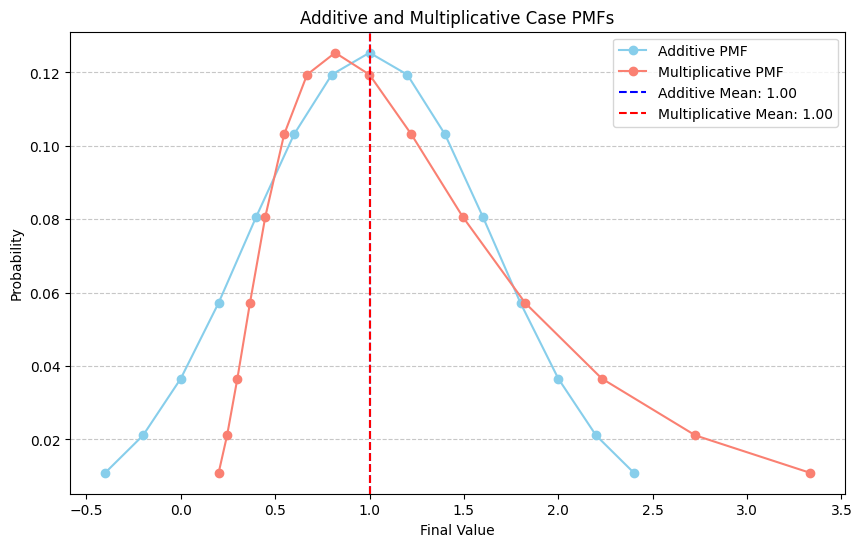

In [5]:
def plot_pmf(additive_pmf, multiplicative_pmf, delta_add, delta_mult):
    """
    Plots the PMFs for both additive and multiplicative cases on the same plot and adds vertical lines for the means.
    
    Parameters:
    - additive_pmf (dict): PMF for the additive case.
    - multiplicative_pmf (dict): PMF for the multiplicative case.
    - delta_add (float): The additive delta.
    - delta_mult (float): The multiplicative delta.
    """
    # Filter values and probabilities where the probability is greater than 0.01
    values_add = [val for val, prob in additive_pmf.items() if prob > 0.01]
    probabilities_add = [additive_pmf[val] for val in values_add]
    
    values_mult = [val for val, prob in multiplicative_pmf.items() if prob > 0.01]
    probabilities_mult = [multiplicative_pmf[val] for val in values_mult]
    
    # Calculate means
    mean_add = sum(val * prob for val, prob in additive_pmf.items())
    mean_mult = sum(val * prob for val, prob in multiplicative_pmf.items())
    
    plt.figure(figsize=(10, 6))
    plt.plot(values_add, probabilities_add, marker='o', color='skyblue', linestyle='-', label='Additive PMF')
    plt.plot(values_mult, probabilities_mult, marker='o', color='salmon', linestyle='-', label='Multiplicative PMF')
    
    # Add vertical lines for the means
    plt.axvline(mean_add, color='blue', linestyle='--', label=f'Additive Mean: {mean_add:.2f}')
    plt.axvline(mean_mult, color='red', linestyle='--', label=f'Multiplicative Mean: {mean_mult:.2f}')
    
    plt.xlabel('Final Value')
    plt.ylabel('Probability')
    plt.title('Additive and Multiplicative Case PMFs')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example Usage
if __name__ == "__main__":
    # Parameters
    delta_add = 0.1
    delta_mult = 0.1
    n_steps = 40
    prob_up = 0.5
    
    # Compute Additive PMF
    additive_pmf = compute_additive_pmf(delta=delta_add, n=n_steps, p=prob_up)
    
    # Compute Multiplicative PMF
    multiplicative_pmf = compute_multiplicative_pmf(delta=delta_mult, n=n_steps, p=prob_up)
    
    # Plot both PMFs
    plot_pmf(additive_pmf, multiplicative_pmf, delta_add, delta_mult)
